# 📌 PROJECT TITLE

---

# **Genomic DNA Classification Using Machine Learning**

# 📌 PROJECT DESCRIPTION

---





*   Predict whether a given DNA sequence belongs to a bacterial organism or not using Machine Learning.
*   An end-to-end ML approach using DNA sequence classification.



# 🧬 PROJECT FLOW

---


1. Load the DNA sequence dataset.
2. Convert DNA sequences into numerical features.
3. Split the data into training and testing sets.
4. Train a Random Forest model.
5. Predict and evaluate the results.


# Step 1 -> Upload Dataset Files

---



In [ ]:
from google.colab import files
uploaded = files.upload()


Saving testX.csv to testX.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving trainYX.csv to trainYX.csv


# Step 2 -> Verify Files Are Uploaded

---



In [ ]:
import os
os.listdir()


['.config', 'trainYX.csv', 'testX.csv', 'sample_data']

# Step 3 -> Import Libraries

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools


pandas → read CSV files, handle tables

numpy → numerical computations

matplotlib, seaborn → plots and graphs

itertools → used to combine lists

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier


CountVectorizer → converts text → numbers

RandomForestClassifier → ML model

Metrics → to check model performance

# Step 4 -> Load the Dataset

---



In [ ]:
train_df = pd.read_csv("trainYX.csv")
test_df  = pd.read_csv("testX.csv")


In [ ]:
train_df.head()


,id,Y,DNA
0,0,0,CCTACTCTAAAGAGATTTGCAGTTGCGATGAGAAGCTTACCTCGAG...
1,1,1,CGGCGGTAGCAGCGCGGGCGAGACCCGCGAGGCGCGGCGGGTTGAA...
2,2,1,TTATCCCATATTGACACAGGTATCCGGCGAGGCTGATGCGCACGCT...
3,3,1,CTGCTCCCTCGAAATGCGCGCGCGTAGTCGCCCTCCGACGGCACGA...
4,4,0,GATTTGAATGAACTTTAGTTCTTGCTTTCAGAAATAAAGTACAGTA...


Each row = one DNA sample

DNA = input

Y = output (what we want to predict)

# Separate Input and Output

---



In [ ]:
X_text = train_df["DNA"]
y = train_df["Y"]


X_text → only DNA sequences

y → answers (0 or 1)

# Sanity Check

---



In [ ]:
print("Train shape:", train_df.shape)
print("Test shape :", test_df.shape)
print(y.value_counts())


Train shape: (100000, 3)
Test shape : (20000, 2)
Y
0    50063
1    49937
Name: count, dtype: int64


Check if data loaded correctly

Check if both classes exist

Check class balance

If one class dominates → model can cheat.

# Step 5 -> Understand The Data

---



## 5.1 Class Distribution




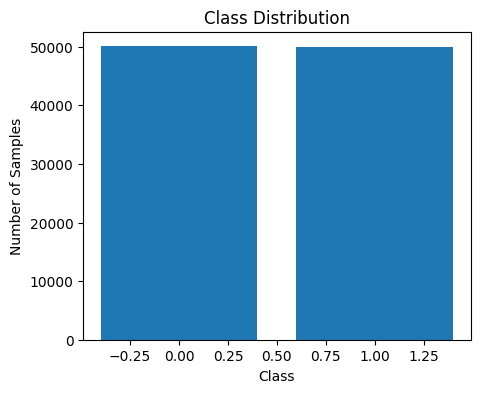

In [ ]:
# Count number of samples in each class
class_counts = y.value_counts()

# Plot using matplotlib
plt.figure(figsize=(5,4))
plt.bar(class_counts.index, class_counts.values)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.show()


Insights:

0 → 50,063 samples  
1 → 49,937 samples

* The class distribution plot shows that both classes are almost equally represented in the dataset. This balanced distribution ensures unbiased learning and allows the model to effectively learn patterns from both classes


Hence,Our dataset is well balanced.

## 5.2 DNA Sequence Length

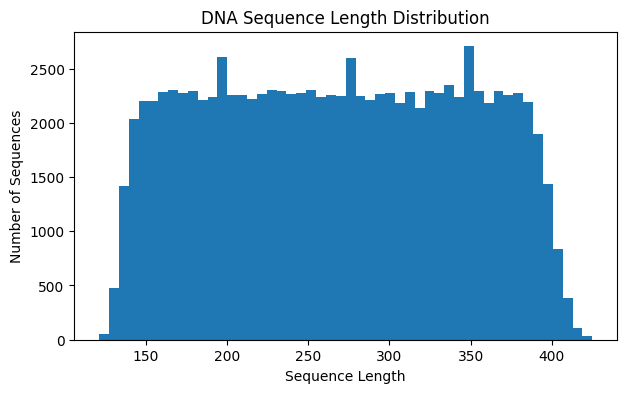

In [ ]:
# Calculate length of each DNA sequence
seq_len = X_text.apply(len)

# Plot using matplotlib
plt.figure(figsize=(7,4))
plt.hist(seq_len, bins=50)
plt.title("DNA Sequence Length Distribution")
plt.xlabel("Sequence Length")
plt.ylabel("Number of Sequences")
plt.show()


1️⃣ seq_len = X_text.apply(len)

Takes each DNA sequence

Counts how many letters it has

Converts DNA → numbers (lengths)

2️⃣ plt.hist(seq_len, bins=50)

Draws a histogram

X-axis → DNA length

Y-axis → how many sequences have that length

bins=50 → groups lengths into 50 ranges

INSIGHTS:

* This plot shows the distribution of DNA sequence lengths. Since the sequences vary in length, raw DNA cannot be directly used for machine learning, motivating the use of k-mer based feature extraction.

# Step 6 -> Core Concept – k-mers

---



❓ What is a k-mer?

A k-mer is a substring of length k.

Example:

DNA = ATCGT
k = 3

3-mers:
ATC
TCG
CGT


Why this works:

* Biology has local patterns

* ML learns better from small repeated patterns

* DNA has only 4 letters, so combinations are limited

## Define k-mer Function

---



In [ ]:
def get_kmers(seq, k=3):
    return [seq[i:i+k] for i in range(len(seq)-k+1)]


This function:

* Takes one DNA sequence

* Breaks it into overlapping 3-letter chunks

## Exploring Common k-mers (Top 10)

---



In [ ]:
all_kmers = list(itertools.chain(*X_text.apply(get_kmers)))
top_kmers = pd.Series(all_kmers).value_counts().head(10)


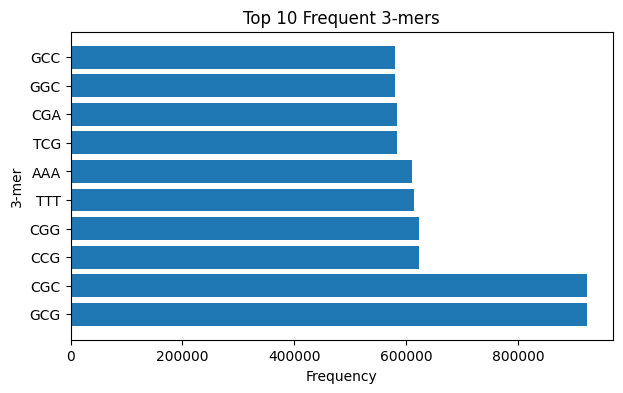

In [ ]:
# Plot top 10 frequent 3-mers using matplotlib
plt.figure(figsize=(7,4))
plt.barh(top_kmers.index, top_kmers.values)
plt.title("Top 10 Frequent 3-mers")
plt.xlabel("Frequency")
plt.ylabel("3-mer")
plt.show()



Insights:

* Some DNA patterns appear very frequently.

* These patterns help the model distinguish classes.

# Step 7 -> FEATURE ENGINEERING (Convert DNA -> Numbers)

---



In [ ]:
vectorizer = CountVectorizer(
    analyzer=lambda x: get_kmers(x, 3)
)

X_kmer = vectorizer.fit_transform(X_text).toarray()


Each possible 3-mer becomes a feature

DNA → frequency of each 3-mer

Result = numerical matrix

In [ ]:
print(X_kmer.shape)


(100000, 64)


Why 64?

4 DNA bases → 4³ = 64 possible 3-mers

# Step 8 -> Train-Validation Split

---



In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_kmer,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


- X_train  → training input
- X_val    → validation input
- y_train  → training labels
- y_val    → validation labels




train_test_split() -> It splits the data into two parts:

🔹 Training set

Used to teach the model

🔹 Validation set

Used to check how well the model learned

This means:

* 20% → validation data

* 80% → training data

From your dataset:

- Total = 100,000

- Training ≈ 80,000

- Validation ≈ 20,000

stratify=y -> keeping the same class ratio in both training and validation sets



# Step 9 -> Train The Model

---



In [ ]:
rf = RandomForestClassifier(
    n_estimators=100, # use 100 trees
    random_state=42 # same result every time
)

rf.fit(X_train, y_train)  # input # fit() = teach the model


RandomForestClassifier(random_state=42)

Why Random Forest?

1.Works well with tabular data

2.Handles non-linear patterns

3.Robust and reliable

4.No heavy tuning needed

# Step 10 -> Evaluate the Model

---



In [ ]:
y_pred = rf.predict(X_val)


In [ ]:
f1 = f1_score(y_val, y_pred)
print("F1-score:", f1)


F1-score: 0.9797440290234808


Why F1-score?

Accuracy can lie

F1 balances mistakes

## Classification Report

---



In [ ]:
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98     10013
           1       0.99      0.97      0.98      9987

    accuracy                           0.98     20000
   macro avg       0.98      0.98      0.98     20000
weighted avg       0.98      0.98      0.98     20000



| Metric    | Meaning                       |
| --------- | ----------------------------- |
| Precision | Correctness of predictions    |
| Recall    | Coverage of actual cases      |
| F1-score  | Balance of precision & recall |
| Support   | Number of samples             |


### ***F1-score*** is a measure that balances precision and recall to evaluate a classification model fairly.

F1-score ≈ 0.98
This means:

✔ Model predictions are mostly correct
✔ Model is not missing many true cases
✔ Model is not biased toward one class

## Confusion Matrix

---



- The confusion matrix visualizes the number of correct and incorrect predictions, showing that most predictions lie along the diagonal, indicating strong model performance

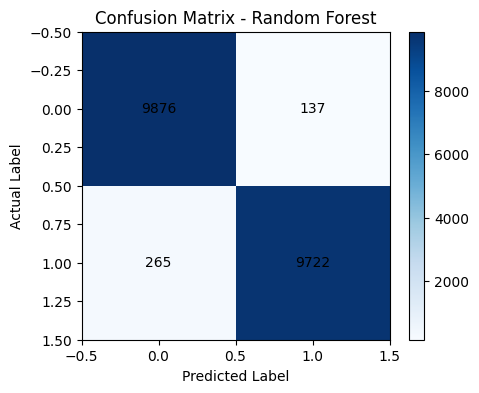

In [ ]:
# Create confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot using matplotlib
plt.figure(figsize=(5,4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.colorbar()

# Add numbers inside the boxes
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 ha="center", va="center", color="black")

plt.show()


| Name                    | Meaning               |
| ----------------------- | ----------------------------------- |
| **True Negative (TN)**  | Actual 0, Predicted 0 (correct)     |
| **False Positive (FP)** | Actual 0, Predicted 1 (wrong alarm) |
| **False Negative (FN)** | Actual 1, Predicted 0 (missed case) |
| **True Positive (TP)**  | Actual 1, Predicted 1 (correct)     |


- Left Diagonal values should be higher - as it shows the correct predictions
- Right diagonal values should be low - as it shows the false predictions

# 🔍 INSIGHTS FROM THE PROJECT

---



1️⃣ DNA sequences can be treated as text data for machine learning

This project shows that genomic DNA sequences can be processed similar to text by breaking them into small patterns (k-mers). This allows traditional machine learning algorithms to be applied effectively to biological data.

---



2️⃣ Local DNA patterns (k-mers) carry strong discriminative information

By using 3-mers, the model successfully captured meaningful local sequence patterns. These short patterns were sufficient to distinguish between the two genomic classes without using complex biological annotations.

---



3️⃣ Feature engineering is more important than model complexity

The high performance achieved (F1-score ≈ 0.98) demonstrates that proper feature extraction plays a crucial role. Even a classical model like Random Forest performs extremely well when the input features are well designed.

---



4️⃣ Random Forest is well suited for genomic classification tasks

Random Forest handled the k-mer frequency features efficiently and captured non-linear relationships in the data. It provided balanced precision and recall, indicating reliable predictions across both classes.

---



5️⃣ Balanced dataset leads to stable and unbiased learning

The nearly equal distribution of class labels helped the model learn without bias. This resulted in consistent performance for both classes and reduced overfitting.

---



6️⃣ F1-score is a reliable metric for biological classification

Using F1-score instead of accuracy ensured that both false positives and false negatives were minimized, which is important in real-world bioinformatics applications.

---



7️⃣ Machine learning can extract biological signals without domain rules

The model learned patterns directly from raw DNA sequences, showing that machine learning can automatically discover hidden biological signals without explicitly programmed biological knowledge.

---



# CONCLUSION

---



This project successfully implemented an end-to-end machine learning pipeline for genomic DNA sequence classification. Raw DNA sequences were transformed into numerical features using k-mer extraction, enabling effective learning by a Random Forest classifier.

The model achieved a high and balanced performance with an F1-score of approximately 0.98, demonstrating that short DNA patterns contain sufficient information for accurate classification. The results highlight the importance of feature engineering and confirm the effectiveness of classical machine learning models in bioinformatics applications.

Overall, this work illustrates how machine learning can bridge biological data and computational techniques, providing a reliable and scalable approach for genomic sequence analysis.

# TESTING

---



In [ ]:
new_dna = ["ATGCGTACGTTAGCGATCGATCGATGCTAGCTA"]


In [ ]:
new_dna_features = vectorizer.transform(new_dna).toarray()


In [ ]:
prediction = rf.predict(new_dna_features)


In [ ]:
if prediction[0] == 1:
    print("🦠 The given DNA sequence is predicted as BACTERIAL DNA")
else:
    print("🧬 The given DNA sequence is predicted as NON-BACTERIAL DNA")


🧬 The given DNA sequence is predicted as NON-BACTERIAL DNA
